<a href="https://colab.research.google.com/github/DrJHSIM/PyTorch_Practice/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor


# Dataset and DataLoader

In [ ]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10844216.50it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 206316.55it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3857747.30it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7915057.55it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [ ]:
image_feature, label = training_data[0]
print(image_feature.shape, label, sep = ', ')

torch.Size([1, 28, 28]), 9


In [ ]:
image_features, labels = next(iter(train_dataloader))
print(image_features.shape, labels.shape)
image_features[0].shape

torch.Size([64, 1, 28, 28]) torch.Size([64])


torch.Size([1, 28, 28])

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [ ]:
img, label = training_data[0]
img.shape
img.squeeze().shape

torch.Size([28, 28])

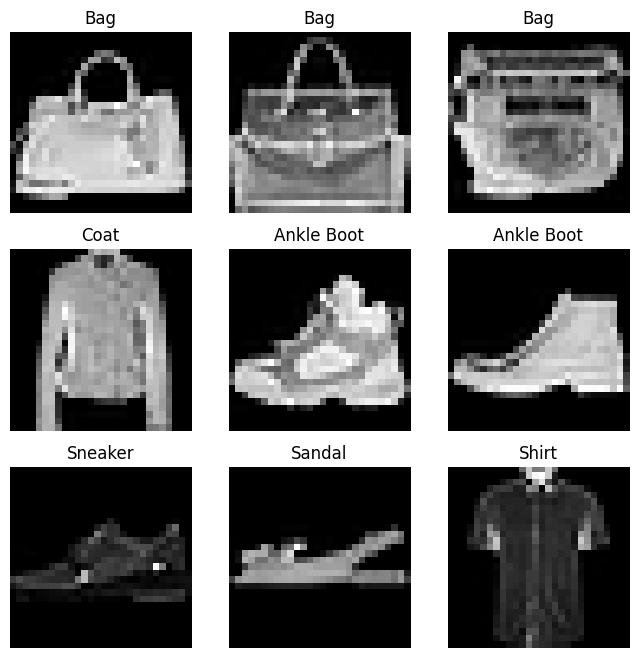

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.title(labels_map[label])
    plt.axis("off")
plt.show()

In [ ]:
img_features, labels = next(iter(train_dataloader))

In [ ]:
img_features.shape

torch.Size([64, 1, 28, 28])

In [ ]:
img_features[0].shape

torch.Size([1, 28, 28])

In [ ]:
labels.shape

torch.Size([64])

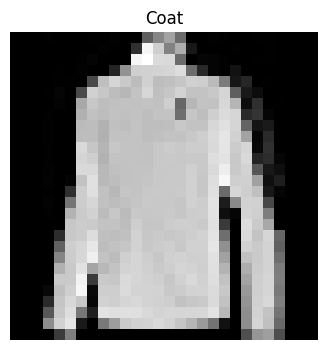

In [ ]:
plt.figure(figsize= (4,4))
plt.imshow(img_features[0].squeeze(), cmap = "gray")
plt.title(labels_map[labels[0].item()])
plt.axis("off")
plt.show()

# CustomDataset

In [ ]:
import os
from torchvision.io import read_image
import pandas as pd

라벨이 적혀있는 csv 파일(labels.csv)이 아래와 같이 정리되어 있을 경우:

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform = False, target_transform = False):
        self.labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
